In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
delivery = pd.read_csv("delivery.csv")                # read the data from input csv file
delivery.head()                                       # view sample data

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


In [6]:
delivery.info()                                      # taking an insight into the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n.prod    25 non-null     int64  
 1   distance  25 non-null     int64  
 2   delTime   25 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 728.0 bytes


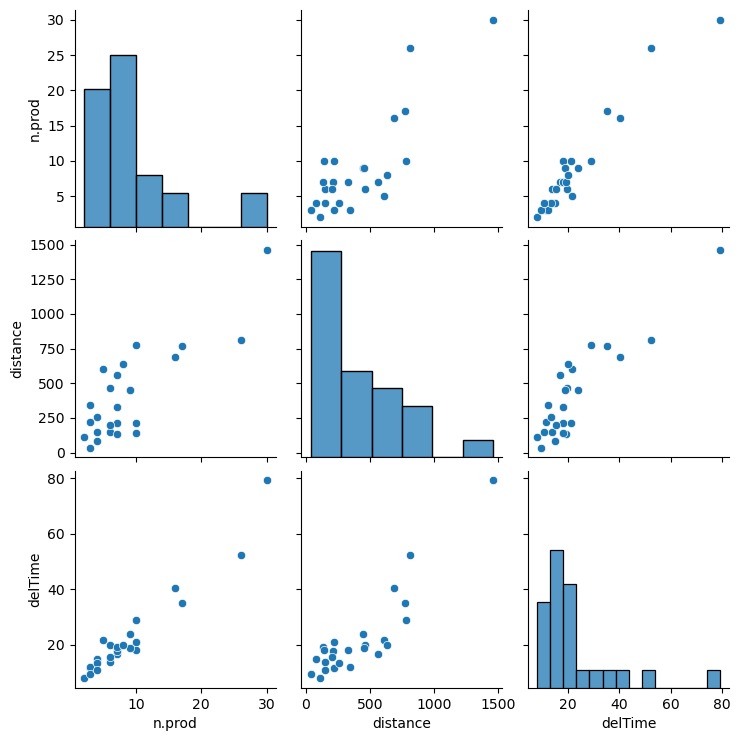

In [8]:
import seaborn as sns                                # Visualizing data
sns.pairplot(delivery)

In [4]:
from sklearn.linear_model import LinearRegression    # importing the required module to build the model
model = LinearRegression()                           # Instantiating the algorithm for building the model
x = delivery[["n.prod", "distance"]]
y = delivery["delTime"]
model.fit(x,y)
print("intercept :", model.intercept_, "coefficeient :", model.coef_)
model.score(x,y)



intercept : 2.3412311451922 coefficeient : [1.61590721 0.01438483]


0.9595937494832257

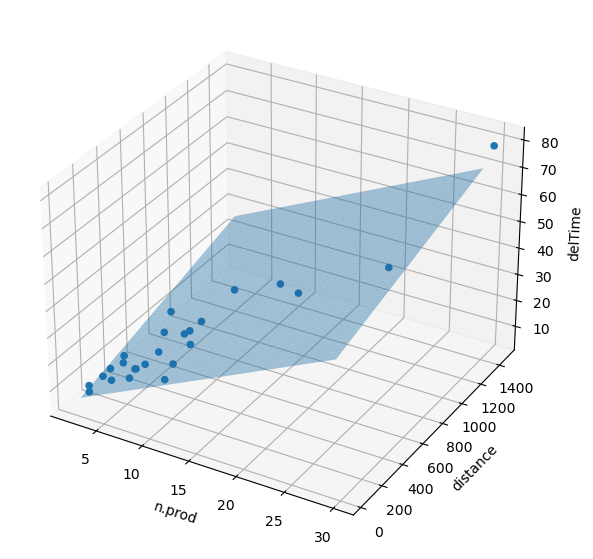

In [7]:
fig = plt.figure(figsize = (7,7))                    #Setting up the plot area
ax =  fig.add_subplot(111, projection = "3d")
ax.scatter(xs = delivery["n.prod"], ys = delivery["distance"], zs = delivery["delTime"], alpha = 1)
ax.set_xlabel("n.prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")

#Creating a mesh of x and y values to plot the regression plane
x_surf = np.arange(delivery["n.prod"].min(), delivery["n.prod"].max(), 1) 
y_surf = np.arange(delivery["distance"].min(), delivery["distance"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'n.prod': x_surf.ravel(), 'distance': y_surf.ravel()})

out = model.predict(X_mesh)                         #Predicting the output of model for every point in the mesh
ax.plot_surface(x_surf, y_surf,                     #Plotting the regression plane
                out.reshape(x_surf.shape),
                alpha = 0.4)                        # apha => transparency of the surface


In a multiple regression model where two or more predictor variables are involved, it is possible that one predictor can be linearly predicted from the others, with a substantial degree of accuracy. In such a situation, the predictors are said to be highly correlated. In statistics, this phenomenon is called multicollinearity, or in other words collinearity between variables (Definition from Wikipedia: Multicollinearity).

Due to collinearity, the coefficient estimates (ß0, ß1, ß2.) of the multiple regression may change erratically in response to small changes in the model or the data. But, for a linear regression model to be valid, it is essential that the predictors of the model are linearly independent of each other.

In case of the delivery time dataset, seen previously, the obtained best fit model 


shall be valid only if the predictor variables (n.prod and distance) are linearly independent of each other.
 

In [11]:
np.corrcoef(delivery["n.prod"], delivery["distance"])   # finding the correlation


array([[1.      , 0.824215],
       [0.824215, 1.      ]])

 To determine the strength of linear relationship between the variables, correlation can be used.
 The variables are suggested to be linearly dependent if the correlation values are close to -1 or 1. 
 

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.Series([variance_inflation_factor(x.values, idx)    #calculating the VIF for each attributes
                for idx in range(x.shape[1])],
               index = x.columns)
vif

n.prod      7.848245
distance    7.848245
dtype: float64

variance inflation factor(VIF) to determine if the predictor variables are independent of each other.
VIF values can be interpreted as follows -

1 => No correlation between variables

1 to 5 => Slightly correlated

Greater than 5 => Highly correlated

It is observed that the VIF values are greater than 5 for both n.prod and distance features. Also both the features are exhibiting a high correlation value between them. 

 

In [10]:
model.score(x,y)                                         # finding'coefficient of determination' (r^2) value for the model




0.9595937494832257

It is observed that the R2 value for the obtained best fit linear regression model is approximately 0.9595937. The R2 value in this case indicates that approximately 95.95 % of the variability observed in the delTime of the vending machine can be explained by variability in the predictor variables, n.prod and distance.
The higher the value of R2 (close to 1), the model is considered as useful.

Adjusted R-squared
To establish a best fit linear regression model with minimum error the least squares method is used. For a linear regression model, every additional predictor variable tends to minimize the error of the model. As a result, the R2 value will never decrease for any number of additional predictor variables that is included in the model.

The below code illustrates the increase in the R2 for an additional predictor that is included in the model.

In [19]:
model1 = LinearRegression()                                 # Model with a single predictor - n.prod
features = ["n.prod"]
target = ["delTime"]
model1.fit(delivery[features],delivery[target])
print("R^2 , performance accuracy score for the model with single predictor:",model1.score(delivery[features],delivery[target]))


model2 = LinearRegression()
features = ["n.prod","distance"]
target = ["delTime"]
model2.fit(delivery[features],delivery[target])
print("R^2 , performance accuracy score for the model with two predictor:",model2.score(delivery[features],delivery[target]))


R^2 , performance accuracy score for the model with single predictor: 0.9304813135986855
R^2 , performance accuracy score for the model with two predictor: 0.9595937494832257
